# <center>CPE378 Machine Learning</center>
# <center>Lab Lecture 09 - Introduction to Reinforcement Learning (RL)</center>
---

## Lab Instruction

This lab, we will implement an Q-learning agent that will solve the GridWorld problem. The objective of your agent is to maximize the reward by find the shortest path to the exit without stepping on a bomb or a cliff. The result will be compare with the randomly move agent.

### Reinforcement Learning

The reinforcement learning components:</br>
<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/rl.png?raw=1' width=500>

- Reinforcement Learning Blog Post (Thai): <a href="https://medium.com/asquarelab/ep-1-reinforcement-learning-%E0%B9%80%E0%B8%9A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%95%E0%B9%89%E0%B8%99-acfa9d42394c"> Thammasorn, A-Square</a></br>
- Reinforcement Learning Blog Post (Eng): <a href="http://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/"> Adventures in Machine Learning</a>

### Temporal-Different Learning
**Temporal-difference (TD) learning** is a combination of **Monte Carlo** ideas and **dynamic programming (DP)** ideas.</br>
Like Monte Carlo methods, TD methods **can learn directly from raw experience without a model of the environment’s dynamics**.</br> 
Like DP, TD methods update estimates based in part on other learned estimates, **without waiting for a final outcome** (they bootstrap).</br>
The relationship between TD, DP, and Monte Carlo methods is a recurring theme in the theory of reinforcement learning

In [2]:
# Setup 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import env as env

### **Environment - Cliff Gridworld**

The environment is a Cliff Gridworld, illustrated as follows: </br>

<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/grid.png?raw=1' width=500></br>

The world is a 10x10 grid where the exit is at bottom right corner. The bomb is randomly generated around the exit.</br>
The agent is randomly start around the top left corner section. </br>
Each step count as -1. In other word, the more step your agent take, the more penalty you have.</br>
If your agent move against the corner, your agent will move. If your agent step to the cliff, the penalty is -20, same as stepping into a bomb which get -10 penalty.</br>
If your agent reach to the exit, you will recieve 20 reward.</br>

The episode is end when your agent found a way out and get a reward or step on a bomb and get the penalty point.</br>
Your agent is at the starting point when the new episode begin.

```env.World```</br>
>**Properties**
- height: The height of a grid world
- width: The width of a grid world
- current_location: current location of your agent.
- actions: a list of an available actions (up,down,left,right)</br>

>**Methods**
- ```available_actions()``` Get a set of available actions
- ```move_agent(action)``` Move an agent to the given direction and return a reward of that action.
- ```reset()``` Reset the state of the environment to the starting point. 
- ```end_state()``` Get the end state. Return True if the state is end. False, otherwise.
- ```render()``` Show the current terran of the grid world

In [3]:
# Initialize environment
env = env.World()

In [4]:
env.available_actions() # ดูว่า available actions ที่สามารถใช้ได้ในปัญหานี้มีอะไรบ้าง

['up', 'down', 'left', 'right']

### **Define Random Agent**

Define an agent that walk randomly.

In [5]:
# Define Random Agent Object
class DumbAgent():
    def action(self, available_actions):
        return np.random.choice(available_actions) # random available actions เลยว่าจะไปทางไหน บน ล่าง ซ้าย ขวา

In [6]:
# Test your code
agent = DumbAgent()
agent.action([1,2,3,4])

1

### **Define a Q-Agent**

Define an agent that used q-learning using the following pseudocode: </br>
<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/q_learning.png?raw=1'>

- S is a state of the environment
- S' is a next state
- A is a action choosen by the agent
- A' is a next action
- epsilon, alpha, gamma are the parameter for the agent

In [7]:
class Q_Agent():
    
    # Initialize Q-Table
    def __init__(self, environment, alpha, gamma, epsilon):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x,y)] = {'up':0,'down':0,'left':0,'right':0}
                
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        
    def action(self, available_actions):
        #
        # Code here
        #
        if np.random.uniform(0,1) < self.epsilon: # Exploration -- ให้ agent พยายามหาเส้นทางอื่น ๆ ที่สามารถไปได้ นอกจากทางที่คิดว่าดีอยู่แล้ว
            return np.random.choice(available_actions)

        else: # Exploitation -- ให้ agent ไปในทางที่คิดว่าดีแล้ว
            S = self.q_table[self.environment.current_location]
            max_value = max(S.values()) # ให้ไปในทิศทางที่ให้ค่า maximum reward
  
            # ถ้า max_value เหมือนกัน ก็จะ random เลยว่าจะไปทางไหนดี
            return np.random.choice([key for key, value in S.items() if value == max_value])
            
    # update ว่าค่า Q-Table เป็นเท่าไร
    def update(self, current_state, reward, next_state, actions):
        #
        # Code here
        #
        S_prime = self.q_table[next_state]
        max_value_S_prime = max(S_prime.values())
        current_Q_value = self.q_table[current_state][actions]
        
        # From the equation in pseudocode
        self.q_table[current_state][actions] = current_Q_value + self.alpha * (reward + self.gamma*max_value_S_prime - current_Q_value)

###  **Deploy Your Agent**

Create a function to run your agent in an environment. Your agent will run n trails, each trails has a maximum of m max_steps_per_episode.</br>
For the Q-agent, you have to update Q-value for your agent using following code: </br>
```python
if learn: 
    agent.update( ... )
```

The function must record the total reward in each trials and return when the function end.
```python
total_reward = run(env, agent, trials, max_steps_per_episode, learn=False)
```

In [8]:
# deploy
def run(env, agent, trials, max_steps_per_episode, learn=False): # learn=False คือ ไม่ได้ใช้ Q-Table ---- learn=True คือ ให้ Agent ใช้ Q-Table ในการเดิน (เป็น policy)
    
    total_reward = []
    for trial in range(trials):
        
        sum_reward = 0
        step = 0
        game_over = False 

        while step < max_steps_per_episode and not game_over: # check ว่า step ในการเดินของ Agent เท่ากับ max_steps_per_episode ยัง หรือ check ว่า game_over ยัง ถ้ายังก็จะเดินไปเรื่อย ๆ  
            
            # Code here
            # Sent the action to environment and get the next state 
            # and reward
            current_state = env.current_location
            action = agent.action(env.actions) # เลือก actions
            reward = env.move_agent(action) # get reward ว่าในการเดินนั้น ๆ ได้ reward เท่าไร
            next_state = env.current_location # เลือก next state
            

            if learn: # learn = True
                agent.update(current_state, reward, next_state, action) # update Q-Table
            
            sum_reward += reward
            step += 1
            
            
            if env.end_state(): # เมื่อ Agent อยู่ใน end state คือ หาทางออกเจอ หรือ เหยียบ bomb
                env.reset() # reset world ใหม่ (พวกcliff, bomb, ตำแหน่งของ agent)
                game_over = True # game over แล้ว
        
        total_reward.append(sum_reward)
    
    return total_reward

In [9]:
# Plot reward
def plot_total_reward(total_reward):
    plt.plot(total_reward)
    plt.title('The Sum of Reward During Each Episode')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')

### **Run a Dump Agent**

In [10]:
## Run
env.reset() # reset world ใหม่ (พวกcliff, bomb, ตำแหน่งของ agent)

agent = DumbAgent()
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=False)

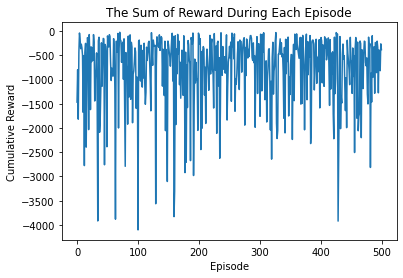

In [11]:
## Plot reward
plot_total_reward(total_reward)

จะเห็นว่า total reward จาก Dump Agent ในแต่ละ episode มีลักษณะขึ้น ๆ ลง ๆ เพราะเป็นการ random โดย Agent ไม่ได้มีการเรียนรู้ หรือ policy ว่าควรจะเดินไปทางไหน เพื่อหาทางออก

### **Run an Q-Agent**

#### **แบบที่ทำในคาบ** 📑

In [12]:
## Run
env.reset() # reset world ใหม่ (พวกcliff, bomb, ตำแหน่งของ agent)

agent = Q_Agent(env, alpha=0.01, gamma=1, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

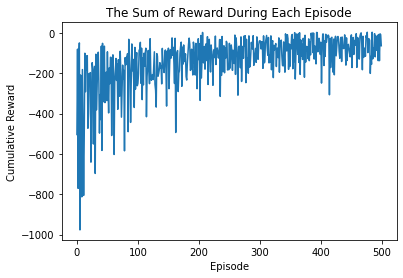

In [13]:
## Plot reward
plot_total_reward(total_reward)

จะเห็นว่า total reward จาก Q-Agent ใน episode แรก ๆ จะมี Cumulative Reward ไม่ค่อยดี แต่เมื่อ episode เพิ่มขึ้นเรื่อย ๆ Cumulative Reward ก็จะดีขึ้นเรื่อย ๆ เช่นกัน เพราะในการเดินของ Agent มีการเรียนรู้ หรือ policy ว่าควรจะเดินไปทางไหน เพื่อให้ได้ maximum reward

#### **In-Class Exercise** ให้ลองปรับค่าต่าง ๆ ใน Q_Agent() และ run() ดูว่าผลที่ได้เป็นอย่างไร

#### **ลองปรับเอง** 📝

##### **-ปรับเฉพาะ alpha จากเดิม 0.01 เป็น 0.05**

In [14]:
## Run
env.reset() # reset world ใหม่ (พวกcliff, bomb, ตำแหน่งของ agent)

agent = Q_Agent(env, alpha=0.05, gamma=1, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

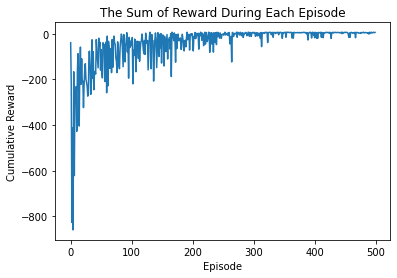

In [15]:
## Plot reward
plot_total_reward(total_reward)

เมื่อเทียบกับ Q-Agent แบบที่ทำในคาบ กับแบบที่ปรับเฉพาะ alpha เป็น 0.05 นี้ จะเห็นว่า Q-Agent แบบที่ปรับเฉพาะ alpha เป็น 0.05 จะมี Cumulative Reward ใน episode หลัง ๆ ดีขึ้นกว่า แบบที่ทำในคาบ

##### **-ปรับเฉพาะ gamma จากเดิม 1 เป็น 0.8**

In [18]:
## Run
env.reset() # reset world ใหม่ (พวกcliff, bomb, ตำแหน่งของ agent)

agent = Q_Agent(env, alpha=0.01, gamma=0.8, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

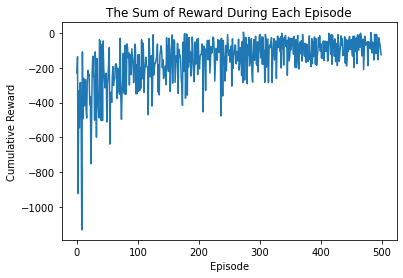

In [19]:
## Plot reward
plot_total_reward(total_reward)

เมื่อเทียบกับ Q-Agent แบบที่ทำในคาบ กับแบบที่ปรับเฉพาะ gamma เป็น 0.8 นี้ จะเห็นว่า Q-Agent แบบที่ปรับเฉพาะ gamma เป็น 0.8 จะมี Cumulative Reward ใน episode หลัง ๆ ดีขึ้นกว่า แบบที่ทำในคาบ อยู่เพียงเล็กน้อย



##### **-ปรับเฉพาะ epsilon จากเดิม 0.05 เป็น 1**

In [22]:
## Run
env.reset() # reset world ใหม่ (พวกcliff, bomb, ตำแหน่งของ agent)

agent = Q_Agent(env, alpha=0.01, gamma=1, epsilon=1)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

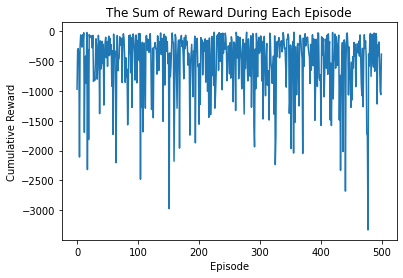

In [23]:
## Plot reward
plot_total_reward(total_reward)

เมื่อเทียบกับ Q-Agent แบบที่ทำในคาบ กับแบบที่ปรับเฉพาะ epsilon เป็น 1 นี้ จะเห็นว่า แบบที่ทำในคาบมี Cumulative Reward ที่ดีกว่ามาก ๆ เนื่องจากการตั้งค่า epsilon = 1 จะทำให้  `if np.random.uniform(0,1) < self.epsilon:` ในฟังก์ชันด้านล่างนี้เป็นจริงตลอด ดังนั้นจึงไม่ต่างกันกับการทำ Dump Agent เลย

```
   def action(self, available_actions):
        if np.random.uniform(0,1) < self.epsilon: # Exploration 
            return np.random.choice(available_actions)

        else: 
            S = self.q_table[self.environment.current_location]
            max_value = max(S.values()) 
            return np.random.choice([key for key, value in S.items() if value == max_value])
```



##### **-ปรับเฉพาะ trials จากเดิม 500 เป็น 100**

In [53]:
## Run
env.reset() # reset world ใหม่ (พวกcliff, bomb, ตำแหน่งของ agent)

agent = Q_Agent(env, alpha=0.01, gamma=1, epsilon=0.05)
total_reward = run(env, agent, trials=100, max_steps_per_episode=1000, learn=True)

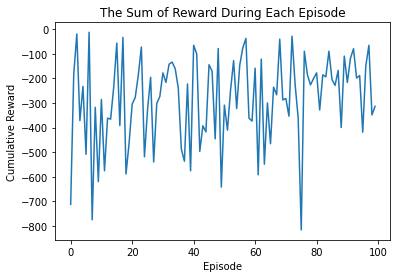

In [54]:
## Plot reward
plot_total_reward(total_reward)

เมื่อเทียบกับ Q-Agent แบบที่ทำในคาบ กับแบบที่ปรับเฉพาะ trials เป็น 100 นี้ จะเห็นว่า Q-Agent แบบที่ปรับเฉพาะ trials เป็น 100 จำนวน trials อาจน้อยเกินไปสำหรับการเรียนรู้ หรือ update Q-Table จึงทำให้แบบที่ทำในคาบดีกว่า

##### **-ปรับเฉพาะ max_steps_per_episode จากเดิม 1000 เป็น 500**

In [69]:
## Run
env.reset() # reset world ใหม่ (พวกcliff, bomb, ตำแหน่งของ agent)

agent = Q_Agent(env, alpha=0.01, gamma=1, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=500, learn=True)

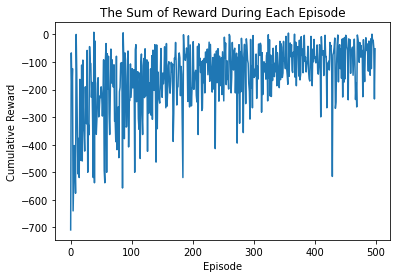

In [70]:
## Plot reward
plot_total_reward(total_reward)

เมื่อเทียบกับ Q-Agent แบบที่ทำในคาบ กับแบบที่ปรับเฉพาะ max_steps_per_episode เป็น 500 นี้ จะเห็นว่า ทั้ง 2 แบบได้ผลที่ใกล้เคียงพอ ๆ กันเลย

### **Show Q-Table**

Show the agent's Q-table using to make a decision.

In [ ]:
def Viz_q_table(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            Viz_q_table(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [ ]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-3.669661692827747
	down
		-3.6712314754759388
	left
		-3.6687344797744936
	right
		-3.6631431267371037
(0, 1)
	up
		-3.669503231982927
	down
		-3.6693879370492377
	left
		-3.677291534849961
	right
		-3.6675278937011724
(0, 2)
	up
		-3.6193880494057837
	down
		-3.6296429565828237
	left
		-3.629462604058096
	right
		-3.623847922424449
(0, 3)
	up
		-3.54945263631269
	down
		-3.554746321461873
	left
		-3.5565929372881913
	right
		-3.6761379062884827
(0, 4)
	up
		-0.5981000000000001
	down
		-0.5997674409846765
	left
		-0.4519167311617912
	right
		-0.59602
(0, 5)
	up
		-0.4
	down
		-0.5980000000000001
	left
		-0.40014454630172436
	right
		-0.4
(0, 6)
	up
		-0.2
	down
		-0.4
	left
		-0.20199999999999999
	right
		-0.398
(0, 7)
	up
		-0.2
	down
		-0.3988642004822047
	left
		-0.2
	right
		-0.2
(0, 8)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.14134009060533811
(0, 9)
	up
		-1.189895781146395
	down
		-1.1965736999077792
	left
		-1.5495365638146619
	right
		-1.1896841487860221




---

